In [89]:
import pandas as pd
import matplotlib.pyplot as plt
#from scipy.ndimage import gahighsian_filter1d
import numpy as np

In [90]:
#input data

input = "L'_CN-L_IR.csv"

df = pd.read_csv(input, sep=",")
df[df.columns[1]] = pd.to_numeric(df[df.columns[1]], errors="coerce")
df[df.columns[2]] = pd.to_numeric(df[df.columns[2]], errors="coerce")

L_CN = df[df.columns[1]]
L_IR = df[df.columns[2]]

In [91]:
L_CN_high = df[df.columns[1]].iloc[0:6]
L_IR_high = df[df.columns[2]].iloc[0:6]

L_CN_low = df[df.columns[1]].iloc[7:16]
L_IR_low = df[df.columns[2]].iloc[7:16]

L_CN_Yang = df[df.columns[1]].iloc[6:7]
L_IR_Yang = df[df.columns[2]].iloc[6:7]

In [92]:
'''
#fitting:y=ax+b

a, b = np.polyfit(L_CN, L_IR, 1)

#plot

plt.figure(figsize=(9,6))
plt.title("L\'$_{CN}$ - L$_{IR}$")
#plt.scatter(L_CN, L_IR, color="black", s=10)
x = df['log_L_CN']
y = df['log_L_IR']

xerr = [df['L_CN_err_low'], df['L_CN_err_high']]
yerr = [df['L_IR_err_low'], df['L_IR_err_high']]

plt.errorbar(
    x, y,
    xerr=xerr, yerr=yerr,
    fmt="none",
    capsize=3, color="black", ecolor="gray"
)
plt.plot(L_CN_high, L_IR_high, "o", color="black", markersize=5)
plt.plot(L_CN_low, L_IR_low, "o", color="darkseagreen", markersize=5, label="low +02")
plt.plot(L_CN, a*L_CN + b, "-", lw=0.5, color="red")


plt.ylim(8.5, 15)
plt.xlabel("L\'$_{CN}$(K$\cdot$km$\cdot$s$^{-1}$$\cdot$pc$^2$)", fontsize=14)
plt.ylabel("L$_{IR}$(L$_\u2609$)", fontsize=14)
#plt.xlim(5, 10)
plt.grid(alpha=0.2)


plt.legend()
plt.show()
'''


<>:29: SyntaxWarning: invalid escape sequence '\c'
<>:29: SyntaxWarning: invalid escape sequence '\c'
C:\Users\USER\AppData\Local\Temp\ipykernel_20660\1272459588.py:29: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel("L\'$_{CN}$(K$\cdot$km$\cdot$s$^{-1}$$\cdot$pc$^2$)", fontsize=14)


'\n#fitting:y=ax+b\n\na, b = np.polyfit(L_CN, L_IR, 1)\n\n#plot\n\nplt.figure(figsize=(9,6))\nplt.title("L\'$_{CN}$ - L$_{IR}$")\n#plt.scatter(L_CN, L_IR, color="black", s=10)\nx = df[\'log_L_CN\']\ny = df[\'log_L_IR\']\n\nxerr = [df[\'L_CN_err_low\'], df[\'L_CN_err_high\']]\nyerr = [df[\'L_IR_err_low\'], df[\'L_IR_err_high\']]\n\nplt.errorbar(\n    x, y,\n    xerr=xerr, yerr=yerr,\n    fmt="none",\n    capsize=3, color="black", ecolor="gray"\n)\nplt.plot(L_CN_high, L_IR_high, "o", color="black", markersize=5)\nplt.plot(L_CN_low, L_IR_low, "o", color="darkseagreen", markersize=5, label="low +02")\nplt.plot(L_CN, a*L_CN + b, "-", lw=0.5, color="red")\n\n\nplt.ylim(8.5, 15)\nplt.xlabel("L\'$_{CN}$(K$\\cdot$km$\\cdot$s$^{-1}$$\\cdot$pc$^2$)", fontsize=14)\nplt.ylabel("L$_{IR}$(L$_☉$)", fontsize=14)\n#plt.xlim(5, 10)\nplt.grid(alpha=0.2)\n\n\nplt.legend()\nplt.show()\n'

In [93]:
#fitting:y=ax+b

L_CN_high_all = pd.concat([L_CN_high, L_CN_Yang])
L_IR_high_all = pd.concat([L_IR_high, L_IR_Yang])

a_high, b_high = np.polyfit(L_CN_high_all, L_IR_high_all, 1)
a_low, b_low = np.polyfit(L_CN_low, L_IR_low, 1)


<>:31: SyntaxWarning: invalid escape sequence '\c'
<>:31: SyntaxWarning: invalid escape sequence '\c'
C:\Users\USER\AppData\Local\Temp\ipykernel_20660\2963716214.py:31: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel("log[L\'$_{CN}$](log[K$\cdot$km$\cdot$s$^{-1}$$\cdot$pc$^2$])", fontsize=14)


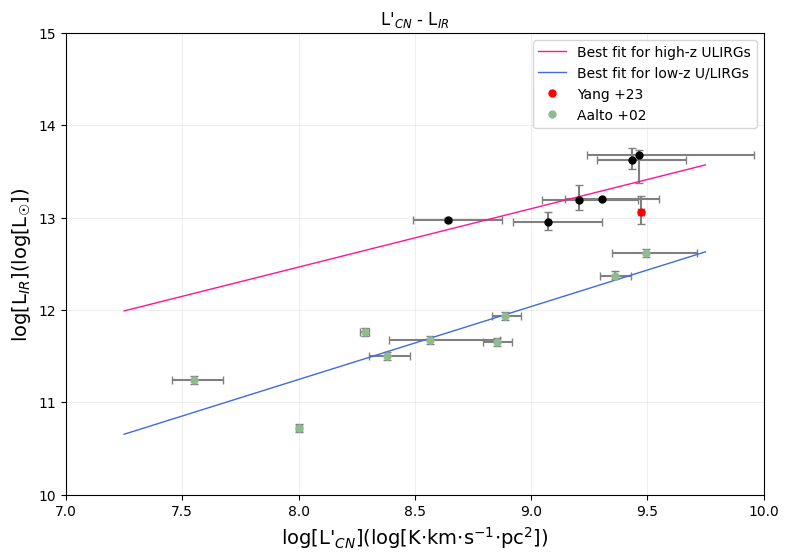

High-z ULIRGs: slope = 0.632, intercept = 7.409
Low-z U/LIRGs (low+02): slope = 0.790, intercept = 4.932


In [94]:
plt.figure(figsize=(9,6))
plt.title("L\'$_{CN}$ - L$_{IR}$")


#x_high = np.linspace(min(L_CN_low), max(L_CN_high), 100)
#x_low = np.linspace(min(L_CN_low), max(L_CN_high), 100)

x_high = np.linspace(7.25, 9.75, 100)
x_low = np.linspace(7.25, 9.75, 100)

x = df['log_L_CN']
y = df['log_L_IR']

xerr = [df['L_CN_err_low'], df['L_CN_err_high']]
yerr = [df['L_IR_err_low'], df['L_IR_err_high']]

plt.errorbar(
    x, y,
    xerr=xerr, yerr=yerr,
    fmt="none",
    capsize=3, color="black", ecolor="gray"
)
plt.plot(x_high, a_high*x_high + b_high, "-", lw=1, color="deeppink", label="Best fit for high-z ULIRGs")
plt.plot(x_low, a_low*x_low + b_low, "-", lw=1, color="royalblue", label="Best fit for low-z U/LIRGs")
plt.plot(L_CN_high, L_IR_high, "o", color="black", markersize=5)
plt.plot(L_CN_Yang, L_IR_Yang, "o", color="red", markersize=5, label="Yang +23")
plt.plot(L_CN_low, L_IR_low, "o", color="darkseagreen", markersize=5, label="Aalto +02")

plt.ylim(10, 15)
plt.xlim(7., 10)
plt.xlabel("log[L\'$_{CN}$](log[K$\cdot$km$\cdot$s$^{-1}$$\cdot$pc$^2$])", fontsize=14)
plt.ylabel("log[L$_{IR}$](log[L$_\u2609$])", fontsize=14)
plt.grid(alpha=0.2)
plt.legend()
plt.show()

print(f"High-z ULIRGs: slope = {a_high:.3f}, intercept = {b_high:.3f}")
print(f"Low-z U/LIRGs (low+02): slope = {a_low:.3f}, intercept = {b_low:.3f}")


<>:49: SyntaxWarning: invalid escape sequence '\c'
<>:49: SyntaxWarning: invalid escape sequence '\c'
C:\Users\USER\AppData\Local\Temp\ipykernel_20660\1269475261.py:49: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel("log[L\'$_{CN}$](log[K$\cdot$km$\cdot$s$^{-1}$$\cdot$pc$^2$])", fontsize=14)


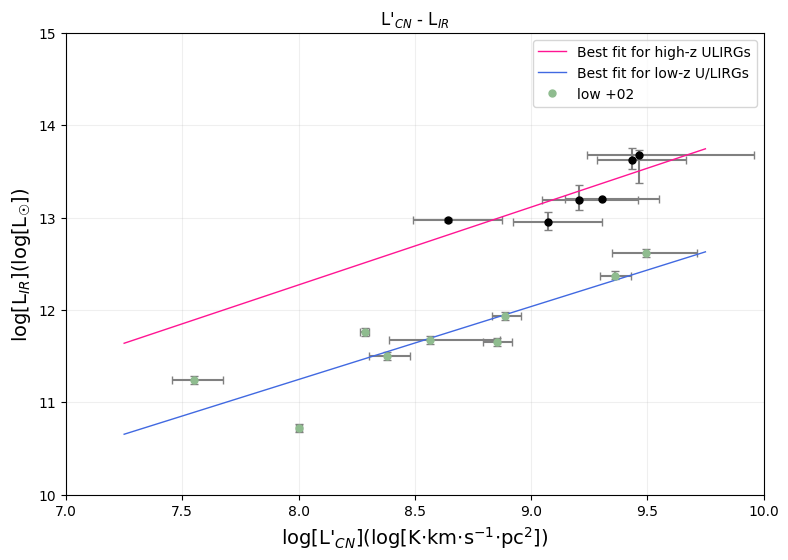

High-z ULIRGs: slope = 0.632, intercept = 7.409
Low-z U/LIRGs (low+02): slope = 0.790, intercept = 4.932


In [95]:
a_line_high, b_line_high = np.polyfit(L_CN_high, L_IR_high, 1)
a_line_low, b_line_low = np.polyfit(L_CN_low, L_IR_low, 1)


plt.figure(figsize=(9,6))
plt.title("L\'$_{CN}$ - L$_{IR}$")


#x_high = np.linspace(min(L_CN_low), max(L_CN_high), 100)
#x_low = np.linspace(min(L_CN_low), max(L_CN_high), 100)

x_line_high = np.linspace(7.25, 9.75, 100)
x_line_low = np.linspace(7.25, 9.75, 100)

x = df['log_L_CN']
y = df['log_L_IR']

x_high = L_CN_high
y_high = L_IR_high
xerr_high = [df['L_CN_err_low'].iloc[0:6], df['L_CN_err_high'].iloc[0:6]]
yerr_high = [df['L_IR_err_low'].iloc[0:6], df['L_IR_err_high'].iloc[0:6]]

x_low = L_CN_low
y_low = L_IR_low
xerr_low = [df['L_CN_err_low'].iloc[7:16], df['L_CN_err_high'].iloc[7:16]]
yerr_low = [df['L_IR_err_low'].iloc[7:16], df['L_IR_err_high'].iloc[7:16]]

plt.errorbar(
    x_high, y_high,
    xerr=xerr_high, yerr=yerr_high,
    fmt="none",
    capsize=3, color="black", ecolor="gray"
)

plt.errorbar(
    x_low, y_low,
    xerr=xerr_low, yerr=yerr_low,
    fmt="none",
    capsize=3, color="black", ecolor="gray"
)
plt.plot(x_line_high, a_line_high*x_line_high + b_line_high, "-", lw=1, color="deeppink", label="Best fit for high-z ULIRGs")
plt.plot(x_line_low, a_line_low*x_line_low + b_line_low, "-", lw=1, color="royalblue", label="Best fit for low-z U/LIRGs")

plt.plot(L_CN_high, L_IR_high, "o", color="black", markersize=5)
plt.plot(L_CN_low, L_IR_low, "o", color="darkseagreen", markersize=5, label="low +02")

plt.ylim(10, 15)
plt.xlim(7., 10)
plt.xlabel("log[L\'$_{CN}$](log[K$\cdot$km$\cdot$s$^{-1}$$\cdot$pc$^2$])", fontsize=14)
plt.ylabel("log[L$_{IR}$](log[L$_\u2609$])", fontsize=14)
plt.grid(alpha=0.2)
plt.legend()
plt.show()

print(f"High-z ULIRGs: slope = {a_high:.3f}, intercept = {b_high:.3f}")
print(f"Low-z U/LIRGs (low+02): slope = {a_low:.3f}, intercept = {b_low:.3f}")
